# Library imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd

import numerical_utility as nu

# Q1

HW2-Q4
f(-2) ≈ 0.0358
f(-1) ≈ 0.1698
f(0) ≈ 0.8896
f(1) ≈ 0.1698
f(2) ≈ 0.0358


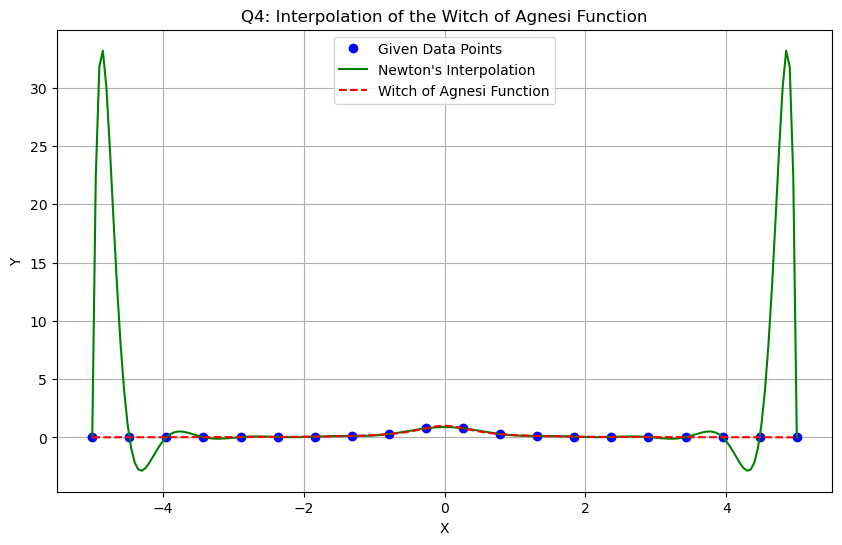

In [6]:
# Q4: Witch of Agnesi
def witch_of_agnesi(x):
    return 1 / (4 * x**2 + 1)

x_data_q4 = np.linspace(-5, 5, 20)
y_data_q4 = witch_of_agnesi(x_data_q4)

x_inter_q4 = np.linspace(-5, 5, 200)
y_inter_q4 = [nu.newton_interpolation(x_data_q4, y_data_q4, xi) for xi in x_inter_q4]


print("HW2-Q4")
for xi in [-2, -1, 0, 1, 2]:
    yi = nu.newton_interpolation(x_data_q4, y_data_q4, xi)
    print(f"f({xi}) ≈ {yi:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(x_data_q4, y_data_q4, 'o', label="Given Data Points", color="blue")
plt.plot(x_inter_q4, y_inter_q4, label="Newton's Interpolation", color="green")
plt.plot(x_inter_q4, witch_of_agnesi(x_inter_q4), label="Witch of Agnesi Function", color="red", linestyle="--")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Q4: Interpolation of the Witch of Agnesi Function")
plt.legend()
plt.grid(True)
plt.show()


HW2-Q6
f(-2) ≈ -56.000000
f(-1) ≈ -16.000000
f(0) ≈ -1.000000
f(1) ≈ -2.000000
f(2) ≈ -6.000000


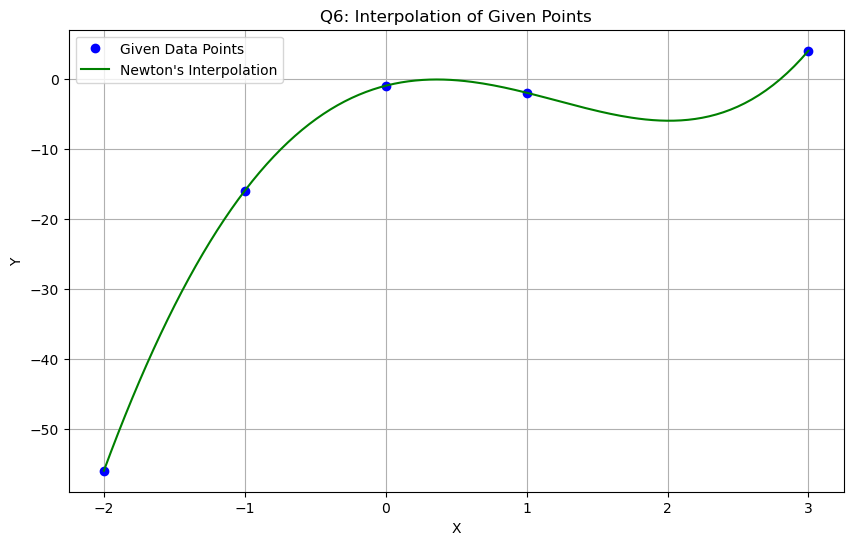

In [7]:
# Q6
x_data_q6 = [1, 0, -2, 3, -1]
y_data_q6 = [-2, -1, -56, 4, -16]

x_inter_q6 = np.linspace(min(x_data_q6), max(x_data_q6), 200)
y_inter_q6 = [nu.newton_interpolation(x_data_q6, y_data_q6, xi) for xi in x_inter_q6]

print("\nHW2-Q6")
for xi in [-2, -1, 0, 1, 2]: 
    yi = nu.newton_interpolation(x_data_q6, y_data_q6, xi)
    print(f"f({xi}) ≈ {yi:.6f}")

plt.figure(figsize=(10, 6))
plt.plot(x_data_q6, y_data_q6, 'o', label="Given Data Points", color="blue")
plt.plot(x_inter_q6, y_inter_q6, label="Newton's Interpolation", color="green")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Q6: Interpolation of Given Points")
plt.legend()
plt.grid(True)
plt.show()

# Q2

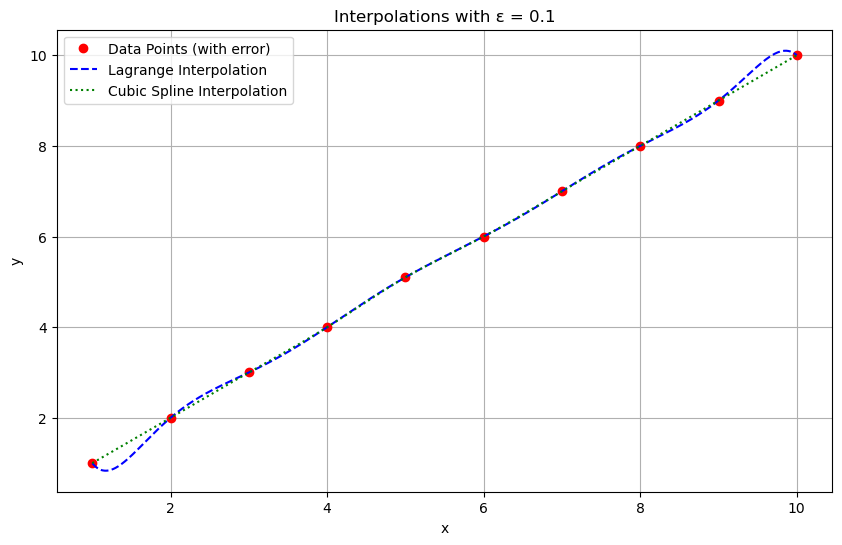

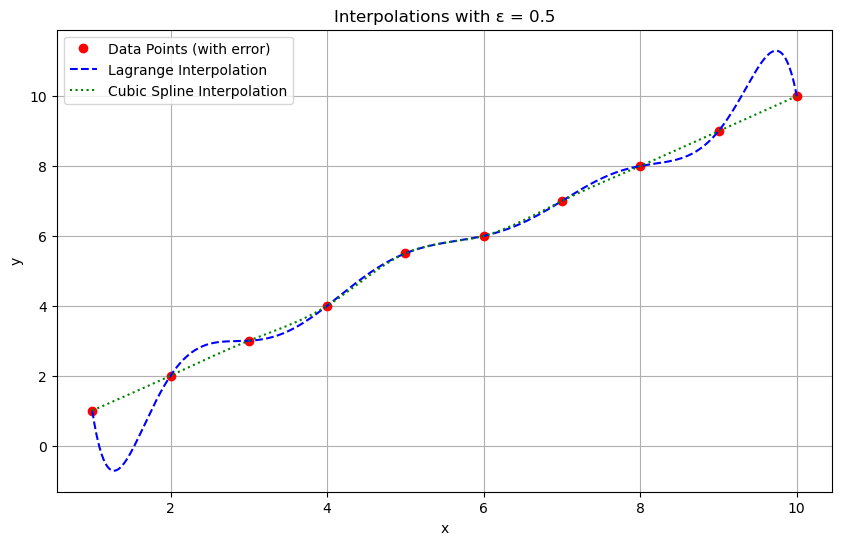

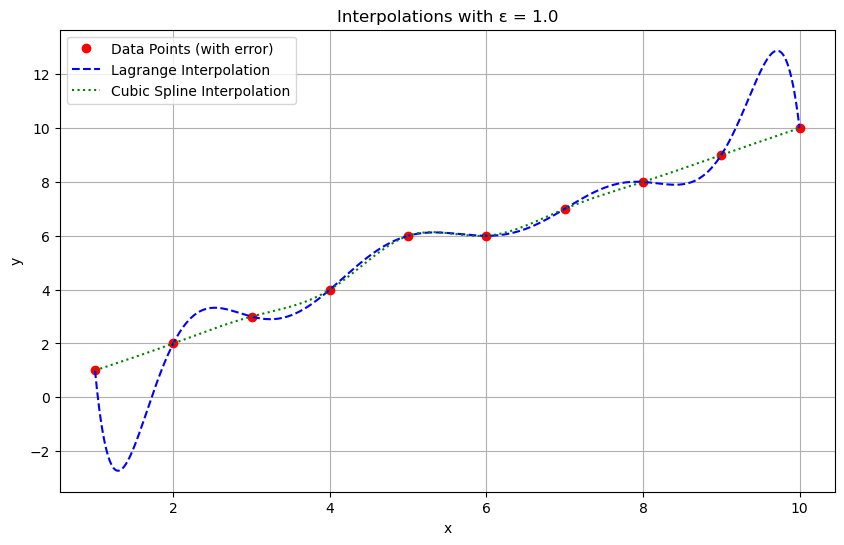

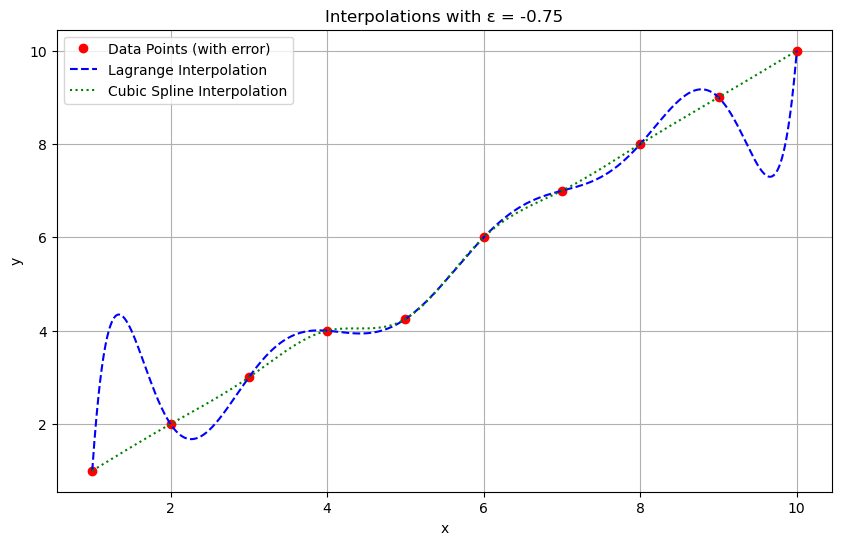

In [10]:
def plot_interpolations(x_pts, y_pts, e):
    y_err = y_pts.copy()
    y_err[4] += e

    xy_points = list(zip(x_pts, y_err))
    x_fine = np.linspace(min(x_pts), max(x_pts), 1000)

    # lagrange interpolation
    P_lagrange = [nu.lagrange_interpolation(xy_points, x, len(x_pts) - 1) for x in x_fine]

    # cubic spline interpolation
    a, b, c, d = nu.cubic_spline_interpolation(x_pts, y_err)
    P_cubicspline = [nu.evaluate_spline(x, x_pts, a, b, c, d) for x in x_fine]

    plt.figure(figsize=(10, 6))
    plt.plot(x_pts, y_err, 'o', label="Data Points (with error)", color="red")
    plt.plot(x_fine, P_lagrange, label="Lagrange Interpolation", linestyle="--", color="blue")
    plt.plot(x_fine, P_cubicspline, label="Cubic Spline Interpolation", linestyle=":", color="green")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"Interpolations with ε = {e}")
    plt.legend()
    plt.grid(True)
    plt.show()

x_pts = list(range(1, 11))
y_pts = list(range(1, 11))

es = [0.1, 0.5, 1.0, -0.75]

for e in es:
    plot_interpolations(x_pts, y_pts, e)

### REMARKS: 

We see that the cubic spline interpolation plots for the verying levels of e do not fluctuate to the extent that the langrange interpolation does. Indeed, with a higher devation of epison from 0 the interpolation plot goes out of whack and shows quite a lot of discrepancies. Also of note is the near mirror imgae like results for negative epsilon value.

# Q5

In [2]:
def f(x):
    return 1 / (1 + x**2)

a, b = -5, 5
x_plot = np.linspace(a, b, 1000)  
n_values = [5, 10, 20, 50]

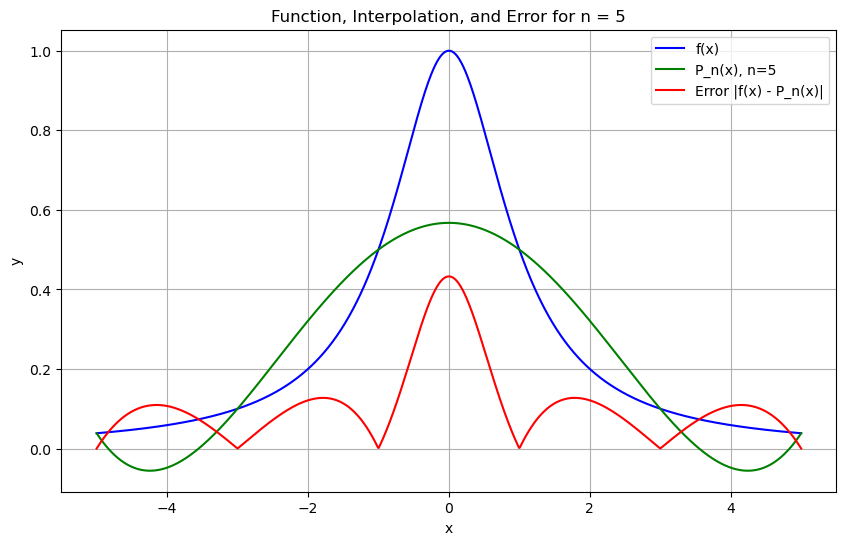

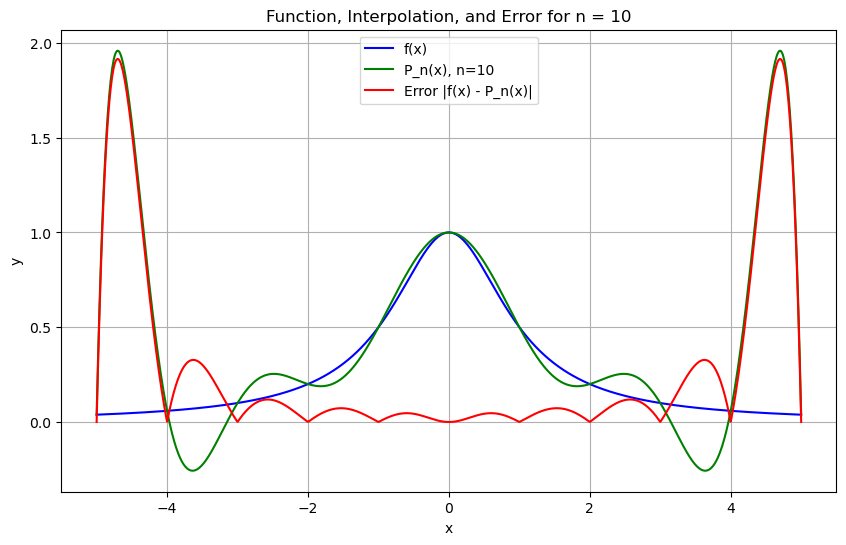

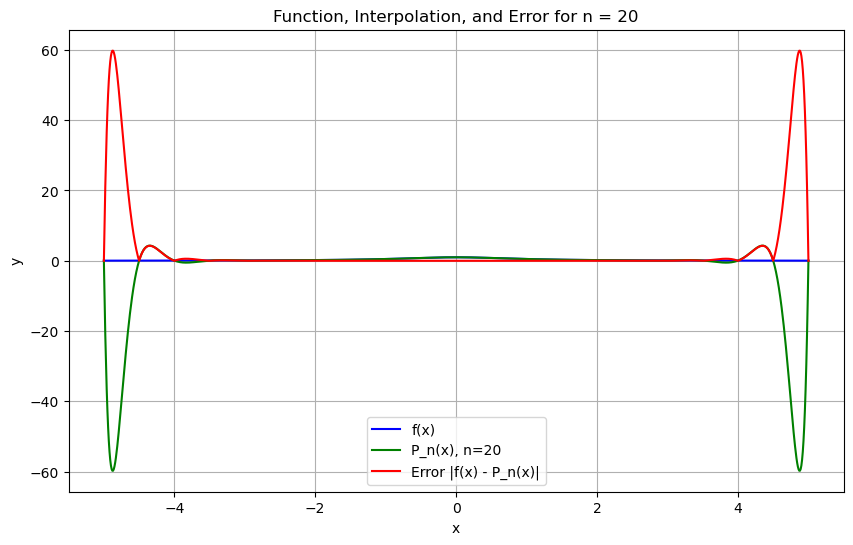

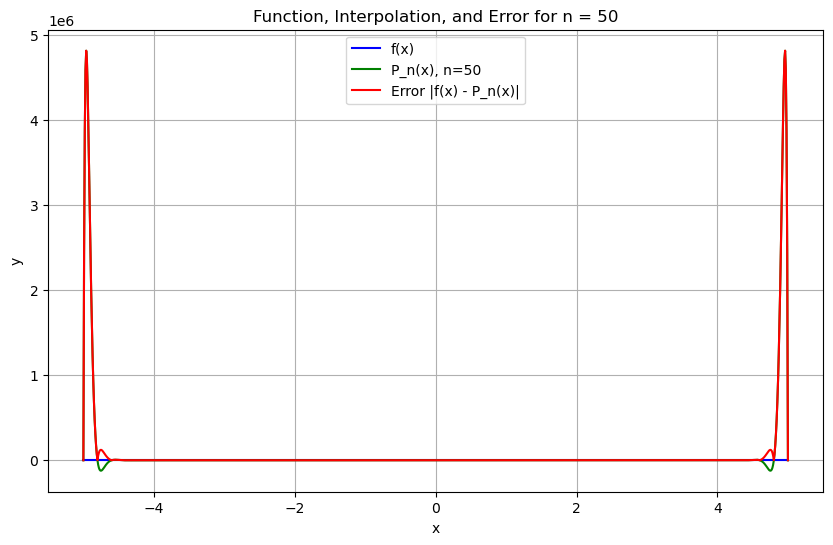

In [3]:
for n in n_values:
    x_pts = nu.base_points(n, a, b)
    y_pts = f(np.array(x_pts))
    xy_points = list(zip(x_pts, y_pts))
    
    P_n = [nu.lagrange_interpolation(xy_points, x, n) for x in x_plot]
    epsilon = np.abs(f(x_plot) - P_n)
    
    plt.figure(figsize=(10, 6))
    plt.plot(x_plot, f(x_plot), label="f(x)", color="blue")
    plt.plot(x_plot, P_n, label=f"P_n(x), n={n}", color="green")
    plt.plot(x_plot, epsilon, label=f"Error |f(x) - P_n(x)|", color="red")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"Function, Interpolation, and Error for n = {n}")
    plt.legend()
    plt.grid(True)
    plt.show()

# Q6

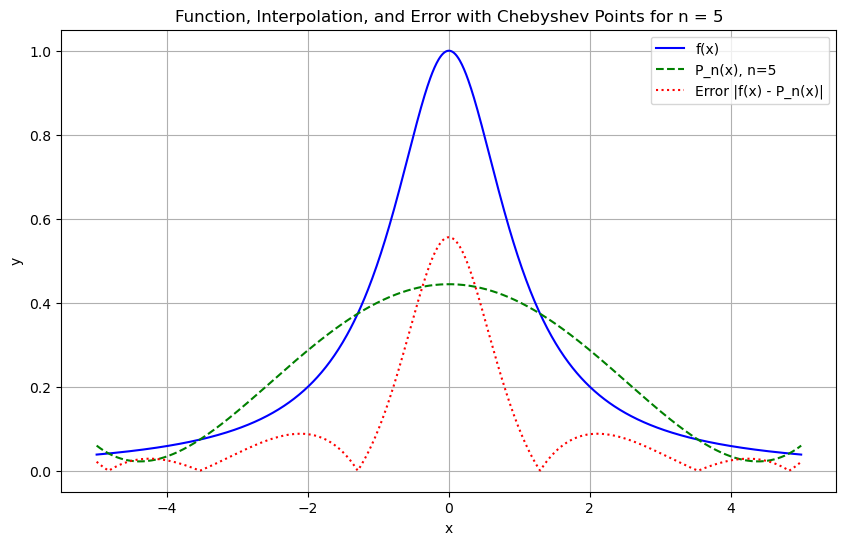

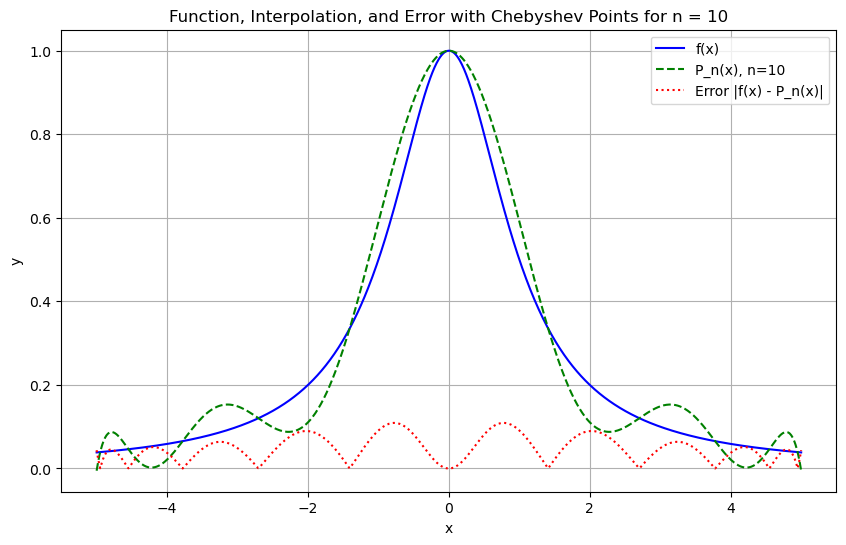

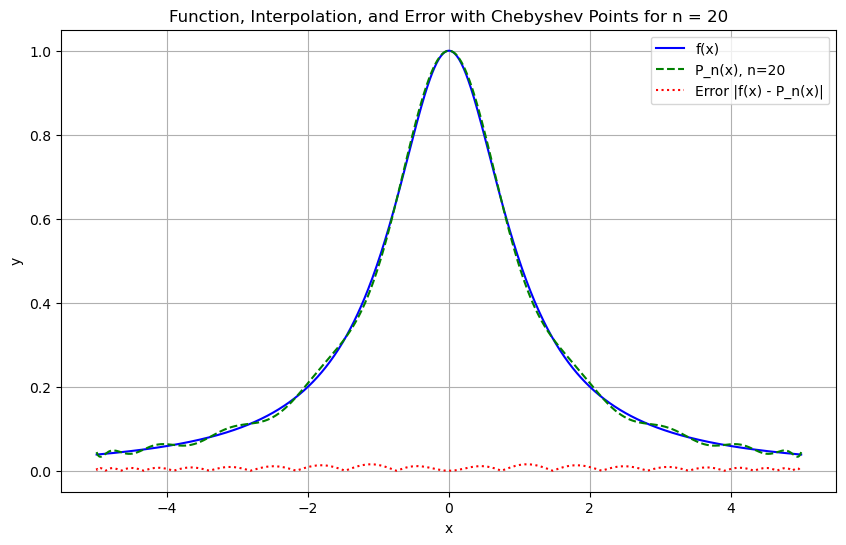

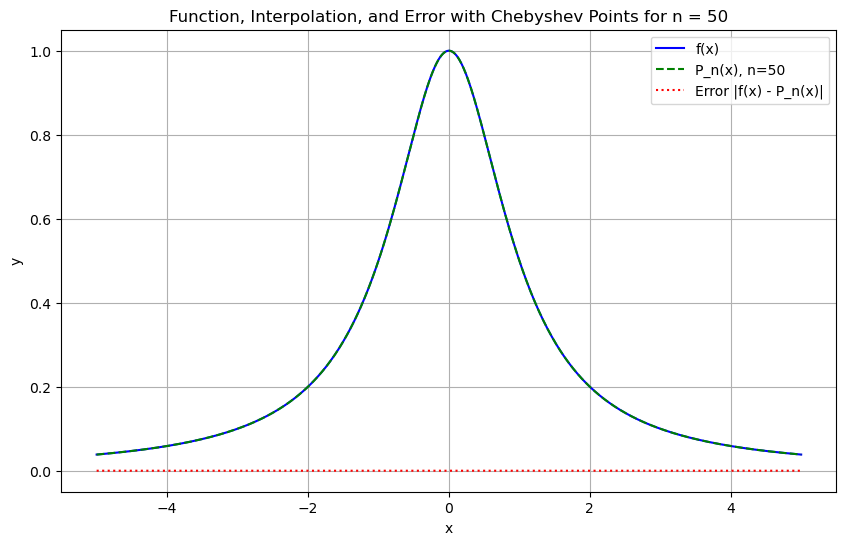

In [4]:
for n in n_values:
    x_pts = nu.chebyshev_points(n, a, b)
    y_pts = f(np.array(x_pts))
    xy_points = list(zip(x_pts, y_pts))
    
    P_n = [nu.lagrange_interpolation(xy_points, x, len(xy_points) - 1) for x in x_plot]
    epsilon = np.abs(f(x_plot) - P_n)
    
    plt.figure(figsize=(10, 6))
    plt.plot(x_plot, f(x_plot), label="f(x)", color="blue")
    plt.plot(x_plot, P_n, linestyle="--", label=f"P_n(x), n={n}", color="green")
    plt.plot(x_plot, epsilon, linestyle=":", label=f"Error |f(x) - P_n(x)|", color="red")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"Function, Interpolation, and Error with Chebyshev Points for n = {n}")
    plt.legend()
    plt.grid(True)
    plt.show()

### REMARKS: (On the diff between Q5 and Q6)

# Q8

In [19]:
aapl = yf.download('AAPL', start='2020-09-01', end='2020-09-19', actions=False)  # actions=False removes dividends

[*********************100%***********************]  1 of 1 completed


In [20]:
aapl

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2020-09-01 00:00:00+00:00,130.982605,134.179993,134.800003,130.529999,132.759995,151948100
2020-09-02 00:00:00+00:00,128.268845,131.399994,137.979996,127.000000,137.589996,200119000
2020-09-03 00:00:00+00:00,117.999535,120.879997,128.839996,120.500000,126.910004,257599600
2020-09-04 00:00:00+00:00,118.077614,120.959999,123.699997,110.889999,120.070000,332607200
2020-09-08 00:00:00+00:00,110.131592,112.820000,118.989998,112.680000,113.949997,231366600
2020-09-09 00:00:00+00:00,114.524368,117.320000,119.139999,115.260002,117.260002,176940500
2020-09-10 00:00:00+00:00,110.785637,113.489998,120.500000,112.500000,120.360001,182274400
2020-09-11 00:00:00+00:00,109.331139,112.000000,115.230003,110.000000,114.570000,180860300


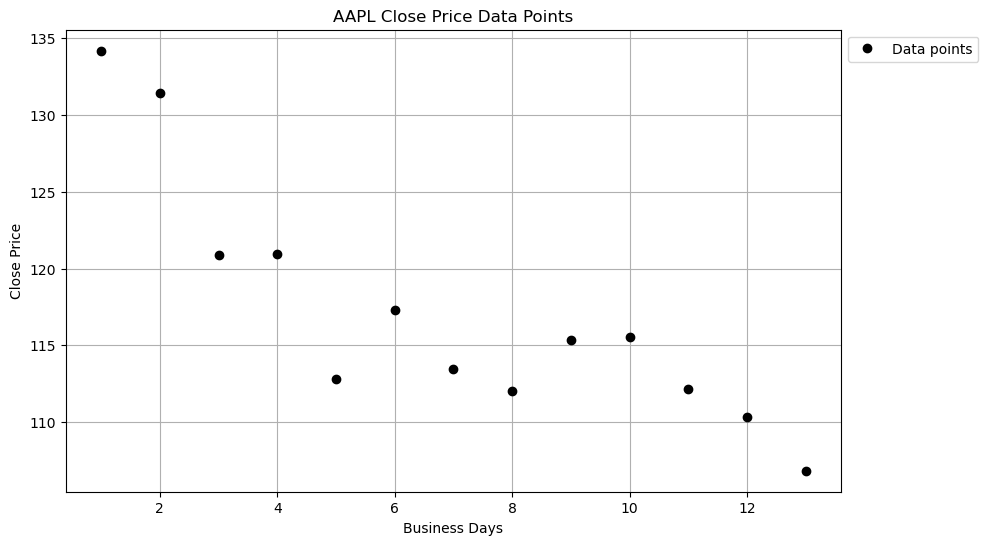

In [21]:
aapl.reset_index(inplace=True)

x = list(range(1, len(aapl) + 1))  # This will give [1, 2, 3, ..., number of rows in aapl]
y = aapl['Close'].values.tolist()  # Extract 'Close' prices as a list
data = tuple(zip(x,y))
# Plot the data points
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', color='black')
plt.xlabel('Business Days')
plt.ylabel('Close Price')
plt.title('AAPL Close Price Data Points')
plt.grid(True)
plt.legend(['Data points'], loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

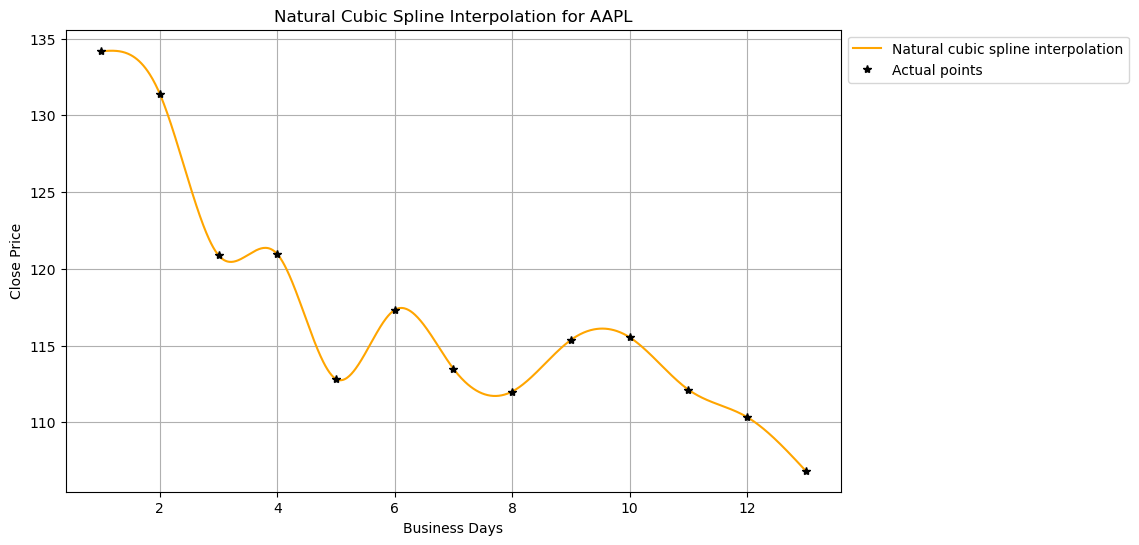

Interpolated price for AAPL for day x = 8.5: 113.58093181076717


In [22]:
# NATURAL CUBIC SPLINE INTERPOLATION

# Assuming aapl is your DataFrame and we have already handled its MultiIndex structure
x = list(range(1, len(aapl) + 1))  # Business days starting from 1
y = aapl[('Close', 'AAPL')].tolist()  # Access 'Close' column for 'AAPL' and convert to list

# Perform natural cubic spline interpolation using the functions from utility.py
a, b, c, d = nu.cubic_spline_interpolation(x, y)

# Generate x values for a smooth plot and evaluate the spline at each x
x1 = np.linspace(min(x), max(x), 1000)
y1 = [nu.evaluate_spline(i, x, a, b, c, d) for i in x1]

# Plot the natural cubic spline and actual data points
plt.figure(figsize=(10, 6))
plt.plot(x1, y1, color='orange', label='Natural cubic spline interpolation')
plt.plot(x, y, '*', color='black', label='Actual points')
plt.xlabel('Business Days')
plt.ylabel('Close Price')
plt.title('Natural Cubic Spline Interpolation for AAPL')
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# Interpolated price at x = 8.5
interpolated_price = nu.evaluate_spline(8.5, x, a, b, c, d)
print(f"Interpolated price for AAPL for day x = 8.5: {interpolated_price}")

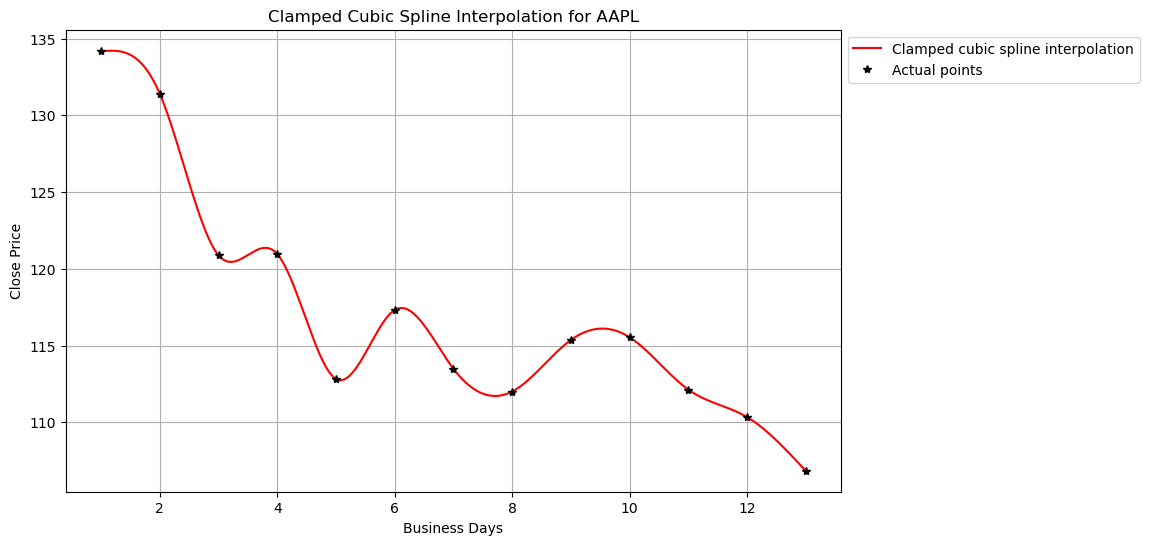

Interpolated price for AAPL for day x = 8.5: 113.58093181076717


In [23]:
# CLAMPED CUBIC SPLINE INTERPOLATION

# Define x and y using the MultiIndex column structure
x = list(range(1, len(aapl) + 1))  # Business days starting from 1
y = aapl[('Close', 'AAPL')].tolist()  # Access 'Close' column for 'AAPL' and convert to list

# Proceed with the rest of the interpolation code
# Specify clamped boundary derivatives (e.g., estimated or known derivatives at endpoints)
fpa = 0.0  # Replace with actual derivative at x[0] if known
fpb = 0.0  # Replace with actual derivative at x[-1] if known

# Perform clamped cubic spline interpolation
a, b, c, d = nu.clamped_cubic_spline(x, y, fpa, fpb)

# Generate x values for smooth plotting and evaluate spline at each x
x1 = np.linspace(min(x), max(x), 1000)
y1 = [nu.evaluate_spline(i, x, a, b, c, d) for i in x1]

# Plot the clamped cubic spline and actual data points
plt.figure(figsize=(10, 6))
plt.plot(x1, y1, color='red', label='Clamped cubic spline interpolation')
plt.plot(x, y, '*', color='black', label='Actual points')
plt.xlabel('Business Days')
plt.ylabel('Close Price')
plt.title('Clamped Cubic Spline Interpolation for AAPL')
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# Interpolated price at x = 8.5
interpolated_price = nu.evaluate_spline(8.5, x, a, b, c, d)
print(f"Interpolated price for AAPL for day x = 8.5: {interpolated_price}")

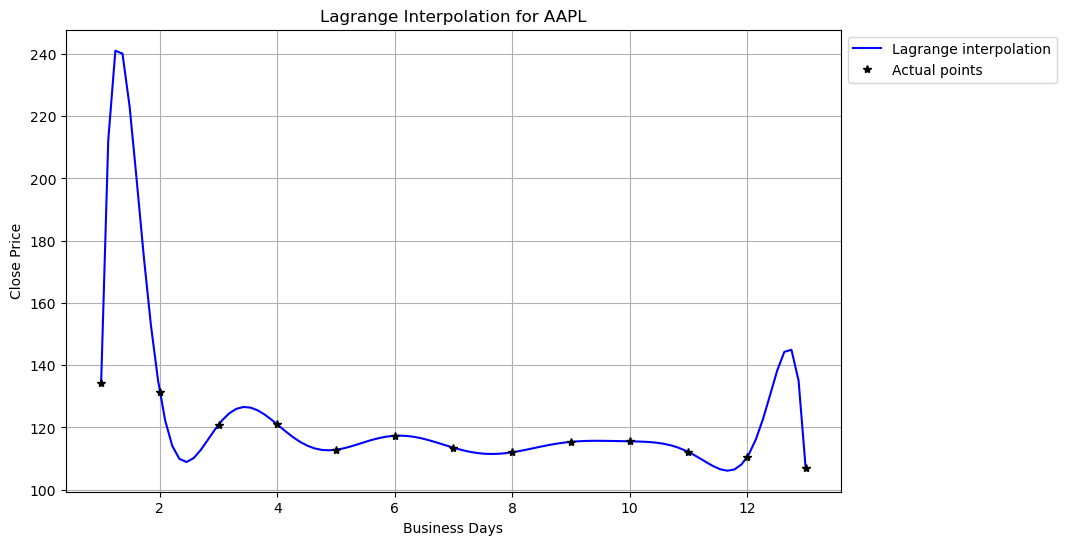

Interpolated price for AAPL for day x = 8.5: 113.87019050535491


In [24]:
# LAGRANGE INTERPOLATION

# Define x and y data
x = list(range(1, len(aapl) + 1))  # Business days starting from 1
y = aapl[('Close', 'AAPL')].tolist()  # Close prices

# Prepare the data points as (x, y) pairs
xy_points = list(zip(x, y))

# Generate values for plotting the Lagrange interpolation
x1 = np.linspace(min(x), max(x), 100)  # 100 points for smooth plotting
y1 = [nu.lagrange_interpolation(xy_points, xi, len(x) - 1) for xi in x1]

# Plot the Lagrange interpolation and actual data points
plt.figure(figsize=(10, 6))
plt.plot(x1, y1, color='blue', label='Lagrange interpolation')
plt.plot(x, y, '*', color='black', label='Actual points')
plt.xlabel('Business Days')
plt.ylabel('Close Price')
plt.title('Lagrange Interpolation for AAPL')
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# Interpolated price at x = 8.5 using Lagrange interpolation
interpolated_price = nu.lagrange_interpolation(xy_points, 8.5, len(x) - 1)
print(f"Interpolated price for AAPL for day x = 8.5: {interpolated_price}")

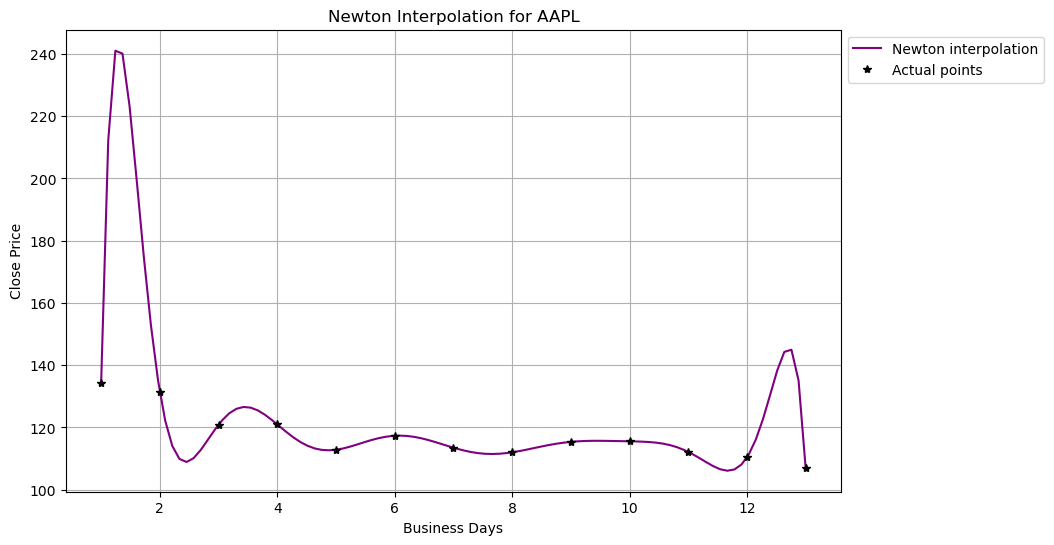

Interpolated price for AAPL for day x = 8.5: 113.8701905053548


In [25]:
# NEWTON INTERPOLATION

# Define x and y data
x = list(range(1, len(aapl) + 1))  # Business days starting from 1
y = aapl[('Close', 'AAPL')].tolist()  # Close prices

# Generate values for plotting the Newton interpolation
x1 = np.linspace(min(x), max(x), 100)  # 100 points for smooth plotting
y1 = [nu.newton_interpolation(x, y, xi) for xi in x1]

# Plot the Newton interpolation and actual data points
plt.figure(figsize=(10, 6))
plt.plot(x1, y1, color='purple', label='Newton interpolation')
plt.plot(x, y, '*', color='black', label='Actual points')
plt.xlabel('Business Days')
plt.ylabel('Close Price')
plt.title('Newton Interpolation for AAPL')
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# Interpolated price at x = 8.5 using Newton interpolation
interpolated_price = nu.newton_interpolation(x, y, 8.5)
print(f"Interpolated price for AAPL for day x = 8.5: {interpolated_price}")

# Q9

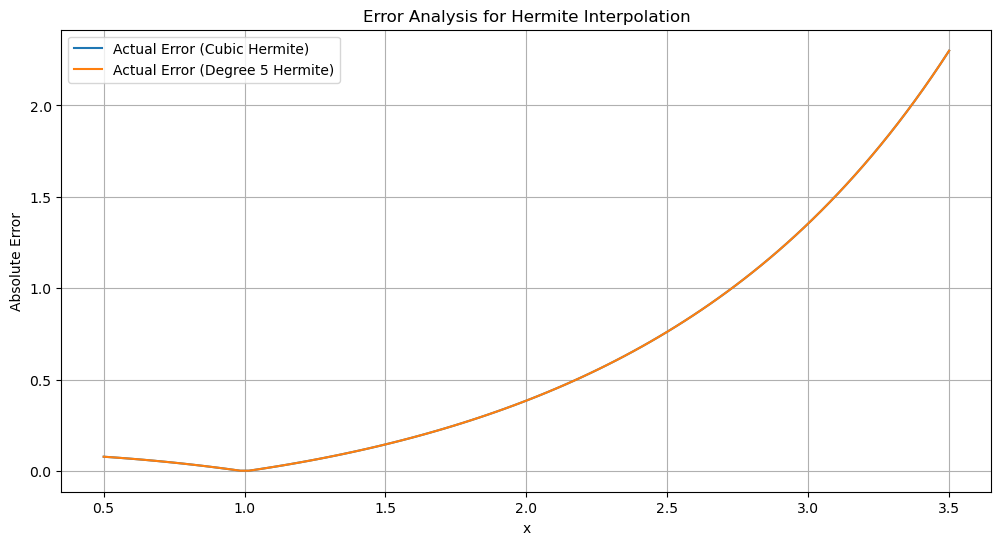

(a) Approximation of f(1.2) with Cubic Hermite: 1.1051709180756477
(a) Actual f(1.2): 1.1548841085249135
(a) Absolute Error: 0.04971319044926581
(b) Approximation of f(1.2) with Degree 5 Hermite: 1.1051709180756477
(b) Actual f(1.2): 1.1548841085249135
(b) Absolute Error: 0.04971319044926581


In [10]:
def f(x):
    return np.exp(x**2 / 10)

def f_prime(x):
    return (x / 5) * np.exp(x**2 / 10)


# Part (a): Cubic Hermite Interpolating Polynomial
x_pts_a = [1, 1.5]
y_values_a = [f(x) for x in x_pts_a]
y_derivatives_a = [f_prime(x) for x in x_pts_a]

z_a, coef_a = nu.hermite_interpolation(x_pts_a, y_values_a, y_derivatives_a)

# Approximate f(1.2) using the polynomial
x_target = 1.2
approx_a = nu.evaluate_hermite(z_a, coef_a, x_target)
actual_a = f(x_target)
error_a = abs(approx_a - actual_a)

# Part (b): Hermite Interpolating Polynomial of Degree 5
x_pts_b = [1, 2, 3]
y_values_b = [f(x) for x in x_pts_b]
y_derivatives_b = [f_prime(x) for x in x_pts_b]

z_b, coef_b = nu.hermite_interpolation(x_pts_b, y_values_b, y_derivatives_b)

# Approximate f(1.2) using the polynomial
approx_b = nu.evaluate_hermite(z_b, coef_b, x_target)
actual_b = f(x_target)
error_b = abs(approx_b - actual_b)

# Calculate error bounds and plot
x_vals = np.linspace(0.5, 3.5, 100)
f_vals = [f(x) for x in x_vals]
approx_vals_a = [nu.evaluate_hermite(z_a, coef_a, x) for x in x_vals]
approx_vals_b = [nu.evaluate_hermite(z_b, coef_b, x) for x in x_vals]

# Convert lists to NumPy arrays to allow element-wise operations
errors_a = np.abs(np.array(f_vals) - np.array(approx_vals_a))
errors_b = np.abs(np.array(f_vals) - np.array(approx_vals_b))

plt.figure(figsize=(12, 6))
plt.plot(x_vals, errors_a, label="Actual Error (Cubic Hermite)")
plt.plot(x_vals, errors_b, label="Actual Error (Degree 5 Hermite)")
plt.xlabel("x")
plt.ylabel("Absolute Error")
plt.title("Error Analysis for Hermite Interpolation")
plt.legend()
plt.grid(True)
plt.show()

print(f"(a) Approximation of f(1.2) with Cubic Hermite: {approx_a}")
print(f"(a) Actual f(1.2): {actual_a}")
print(f"(a) Absolute Error: {error_a}")

print(f"(b) Approximation of f(1.2) with Degree 5 Hermite: {approx_b}")
print(f"(b) Actual f(1.2): {actual_b}")
print(f"(b) Absolute Error: {error_b}")